(1080, 1920, 3)
[0.         0.03921569 0.07843137 0.11764706 0.15686275 0.19607843
 0.23529412 0.2745098  0.31372549 0.35294118 0.39215686 0.43137255
 0.47058824 0.50980392 0.54901961 0.58823529 0.62745098 0.66666667
 0.70588235 0.74509804 1.29411765 1.33333333 1.37254902 1.41176471
 1.45098039 1.49019608 1.52941176 1.56862745 1.60784314 1.64705882
 1.68627451 1.7254902  1.76470588 1.80392157 1.84313725 1.88235294
 1.92156863 1.96078431 2.         2.03921569 2.07843137 2.11764706
 2.15686275 2.19607843 2.23529412 2.2745098  2.31372549 2.35294118
 2.43137255 2.47058824 2.50980392 5.41176471 5.49019608 5.52941176
 5.56862745 5.60784314 5.64705882 5.68627451 5.7254902  5.76470588
 5.80392157 5.84313725 5.88235294 5.92156863 5.96078431 6.        ]


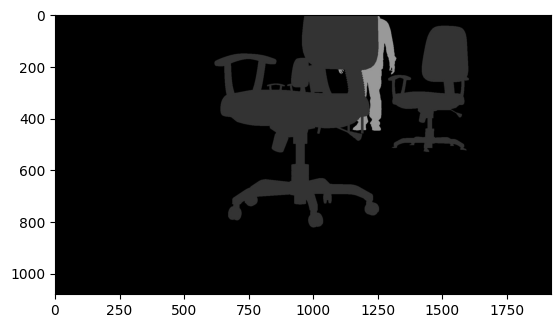

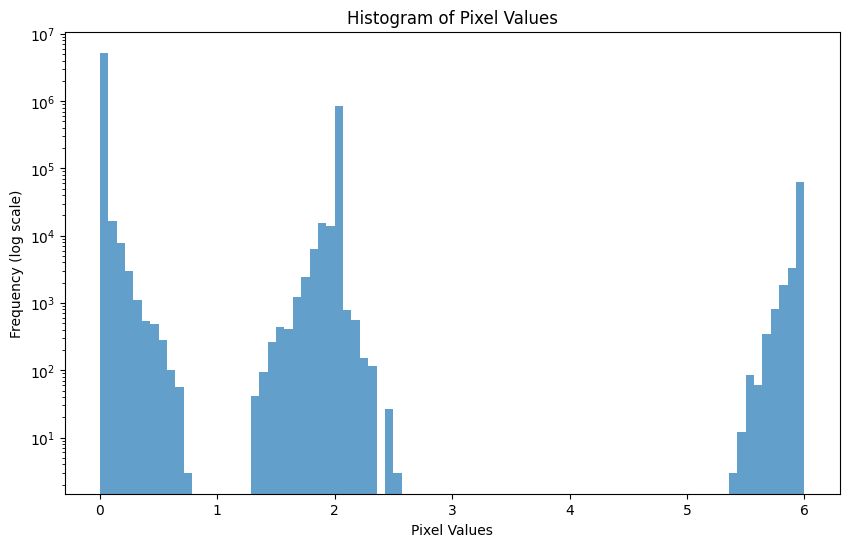

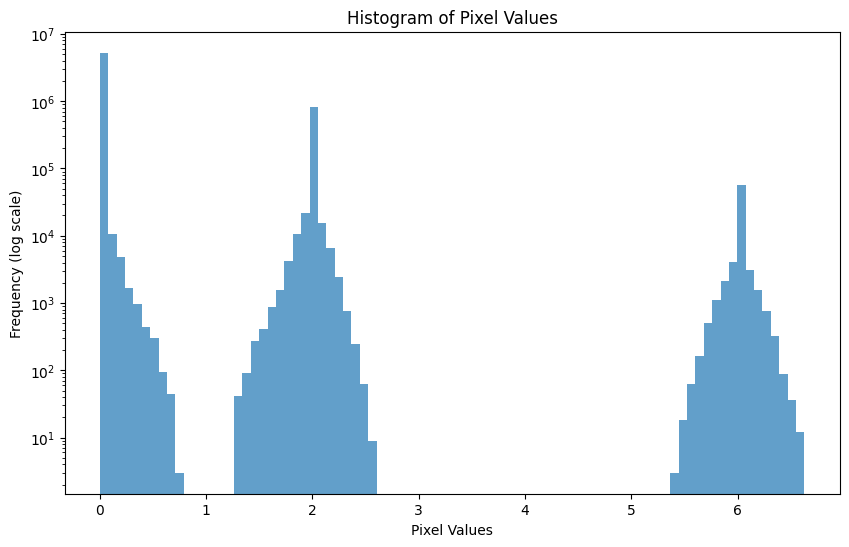

In [1]:
from PIL import Image
import numpy as np
from scipy.ndimage import grey_opening, grey_erosion, grey_dilation, grey_closing, median_filter, gaussian_filter

imgPath = "E:\\datasets\\eirt_output\\batch01\\mask_raw\\Image0000.jpg"

# Load image
img = Image.open(imgPath)

# Convert to NumPy array
arr = np.array(img)/255*10
print(arr.shape)

size = 17
arr2 = median_filter(arr, size=(size, size, 3))
# arr2 = gaussian_filter(arr, sigma=(size, size, 0))
# Define a structuring element

# struct_element = np.ones((size, size, 3))

# # Opening operation on blurred images
# arr = grey_opening(arr, structure=struct_element)
# # arr = grey_closing(arr, structure=struct_element)

# Get unique pixel values
unique_vals = np.unique(arr)
unique_vals2 = np.unique(arr2)

print(unique_vals2)

import cv2
img = cv2.imread(imgPath)
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(arr2.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()

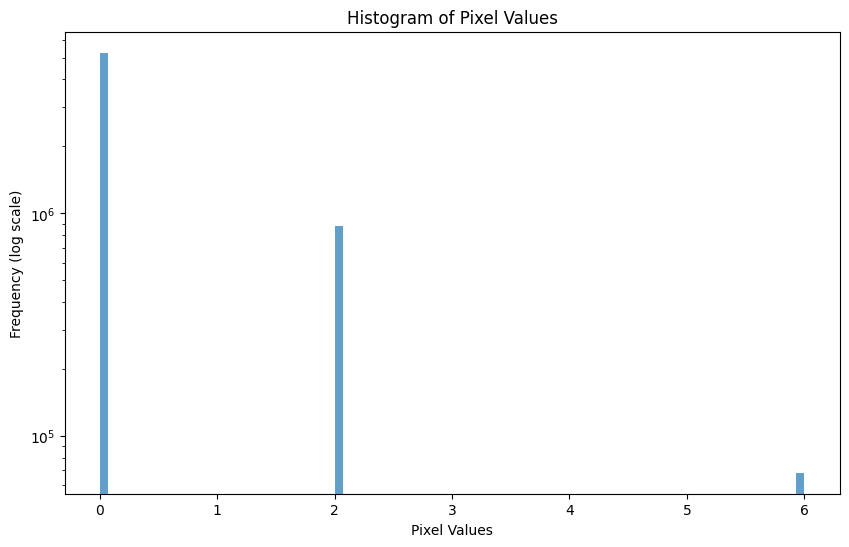

In [7]:
def filter_image(image_array, size):
    # Scale
    image_array = image_array / 255 * 10
    # Apply median filter
    filtered_array = median_filter(image_array, size=(size, size, 3))
    # Round to nearest integer for values within 0.25 of an integer
    rounded_array = np.round(filtered_array)
    mask = np.abs(filtered_array - rounded_array) <= 0.25
    filtered_array = np.where(mask, rounded_array, np.nan)
    # Remove NaN values by setting them to 0 or filter them out
    filtered_array = np.nan_to_num(filtered_array, nan=0.0)
    return filtered_array.astype(np.uint8)

# Load image
img = Image.open(imgPath)
# Convert to NumPy array
arr = np.array(img)
unique_vals = np.unique(arr)


arr = filter_image(arr, size=17)

# Get unique pixel values

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()


In [10]:
import os

input_dir = "E:\\datasets\\eirt_output\\batch01\\mask_raw"
output_dir = "E:\\datasets\\eirt_output\\batch01\\mask"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process all images in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        # Load and process image
        img = Image.open(input_path)
        img_array = np.array(img)
        
        # Apply filter
        filtered_array = filter_image(img_array, size=9)
        
        # Save filtered image as npy file
        output_npy_path = output_path.replace('.jpg', '.npy')
        np.save(output_npy_path, filtered_array)
        
        print(f"Processed: {filename}")

print("All images processed!")

Processed: Image0000.jpg
Processed: Image0001.jpg
Processed: Image0002.jpg
Processed: Image0003.jpg
Processed: Image0004.jpg
Processed: Image0005.jpg
Processed: Image0006.jpg
Processed: Image0007.jpg
Processed: Image0008.jpg
Processed: Image0009.jpg
Processed: Image0010.jpg
Processed: Image0011.jpg
Processed: Image0012.jpg
Processed: Image0013.jpg
Processed: Image0014.jpg
Processed: Image0015.jpg
Processed: Image0016.jpg
Processed: Image0017.jpg
Processed: Image0018.jpg
Processed: Image0019.jpg
Processed: Image0020.jpg
Processed: Image0021.jpg
Processed: Image0022.jpg
Processed: Image0023.jpg
Processed: Image0024.jpg
Processed: Image0025.jpg
Processed: Image0026.jpg
Processed: Image0027.jpg
Processed: Image0028.jpg
Processed: Image0029.jpg
Processed: Image0030.jpg
Processed: Image0031.jpg
Processed: Image0032.jpg
Processed: Image0033.jpg
Processed: Image0034.jpg
Processed: Image0035.jpg
Processed: Image0036.jpg
Processed: Image0037.jpg
Processed: Image0038.jpg
Processed: Image0039.jpg


[0 2 6]


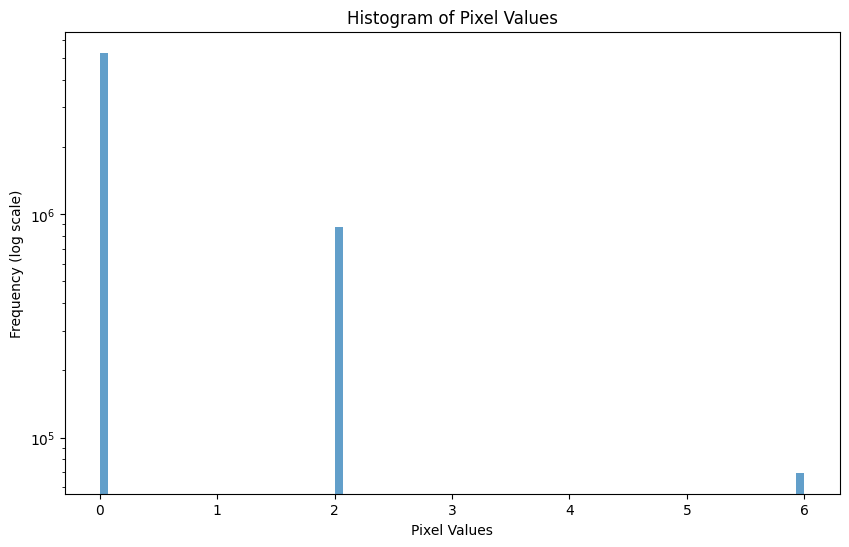

In [ ]:
# img = Image.open("E:\\datasets\\eirt_output\\batch01\\mask\\Image0000.bmp")
arr = np.load("E:\\datasets\\eirt_output\\batch01\\mask\\Image0000.npy")
unique = np.unique(arr)
print(unique)

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')

plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()
